UNIVERSIDADE FEDERAL DE ALFENAS-MG <br>
Trabalho 2 Inteligência Artificial <br>

Guilherme Henrique Pereira Serafini - 2021.1.08.048 <br>
Vinícius Eduardo de Souza Honório - 2021.1.08.024 <br>


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
url = (r'https://raw.githubusercontent.com/megaVE/LearningVerification2/main/thailand_co2_emission_1987_2022.csv')
df = pd.read_csv(url)
#data_csv.head(n=51)
df.head()

,year,month,source,fuel_type,emissions_tons
0,1987,1,transport,oil,1588.61
1,1987,2,transport,oil,1428.29
2,1987,3,transport,oil,1581.16
3,1987,4,transport,oil,1557.40
4,1987,5,transport,oil,1513.35


Plota um grafico que mostra a poluição dos tipos de combustiveis

<Axes: xlabel='fuel_type', ylabel='emissions_tons'>

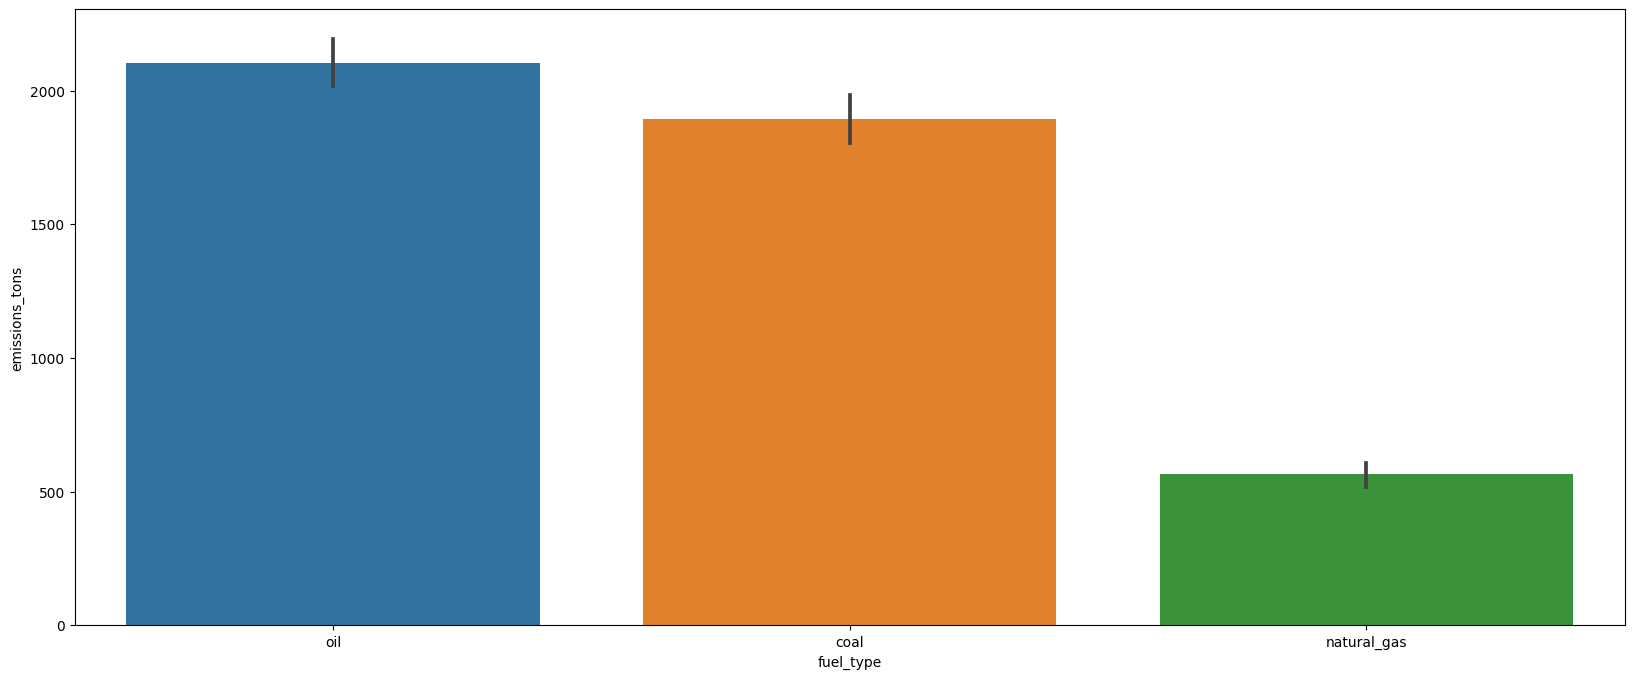

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=df.fuel_type,y=df.emissions_tons,data=df,width=.8,ax=ax)

Emissões de todos os tipos de combustiveis para as categorias, dados originais

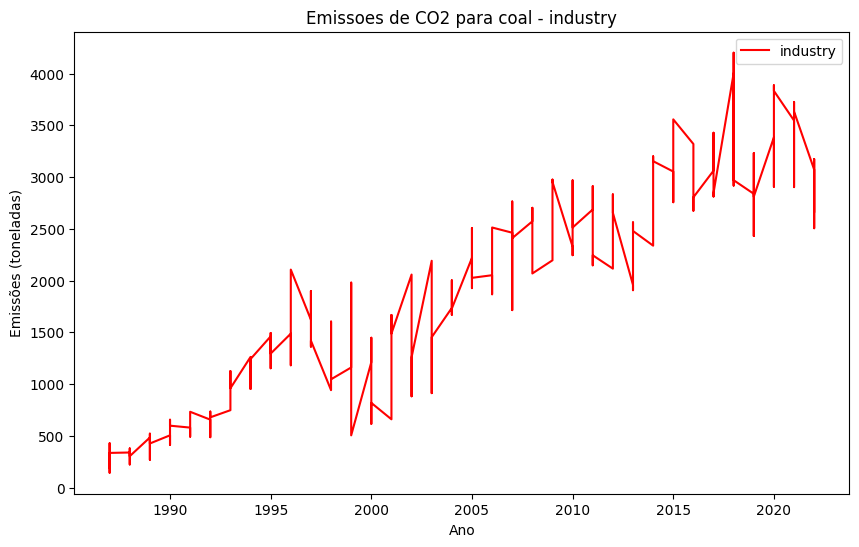

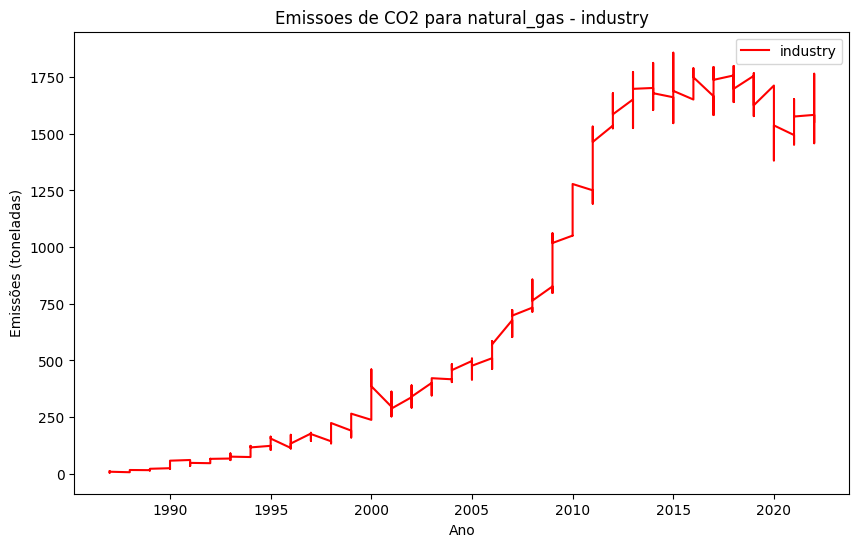

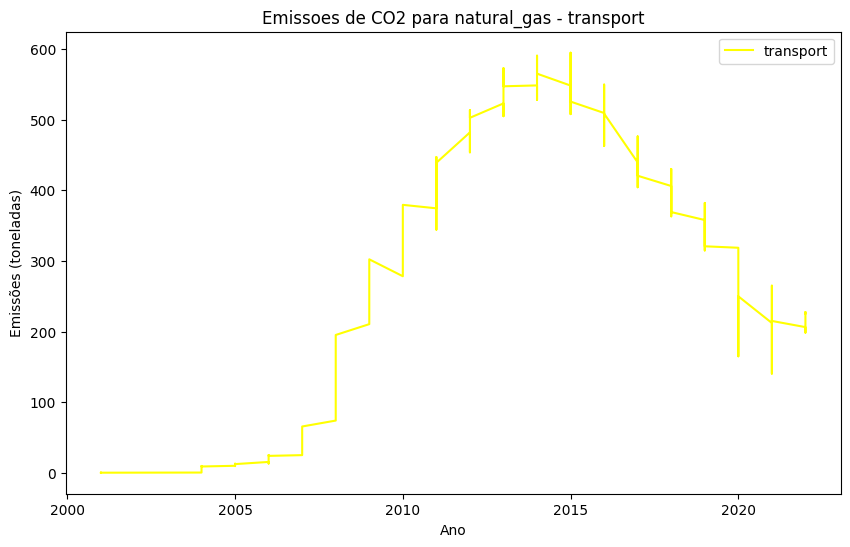

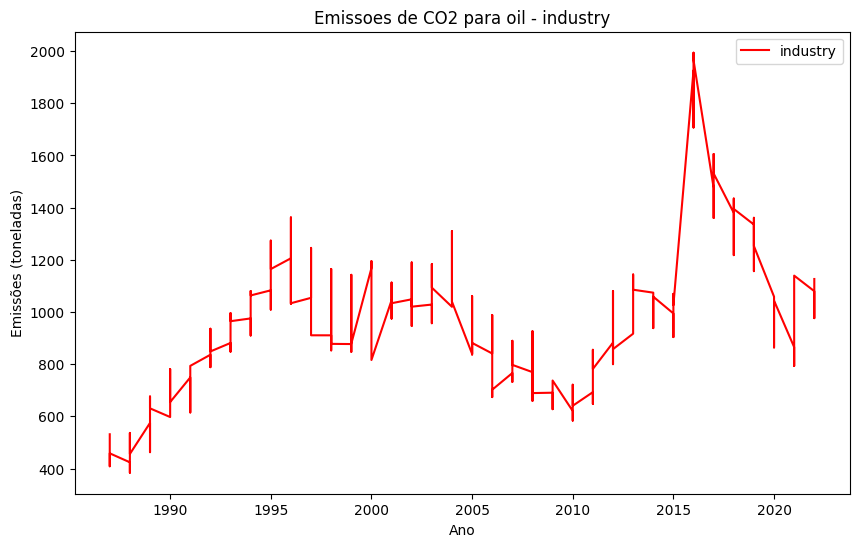

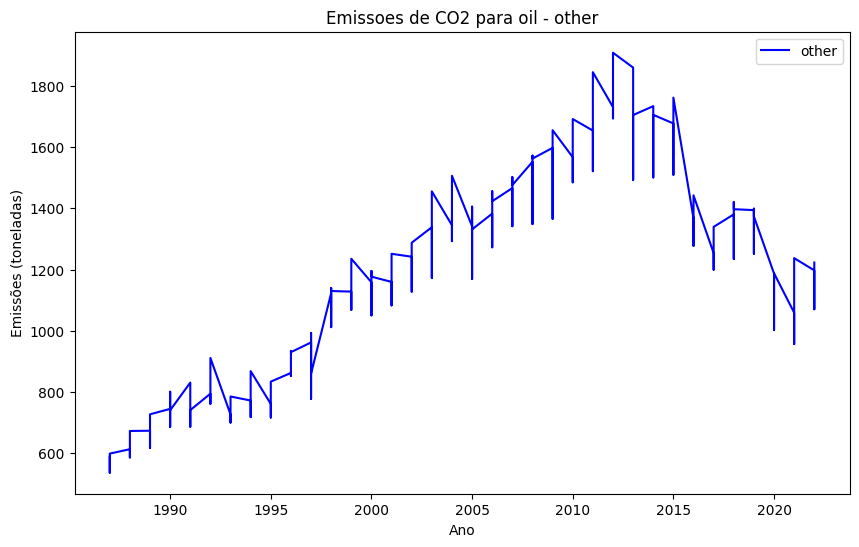

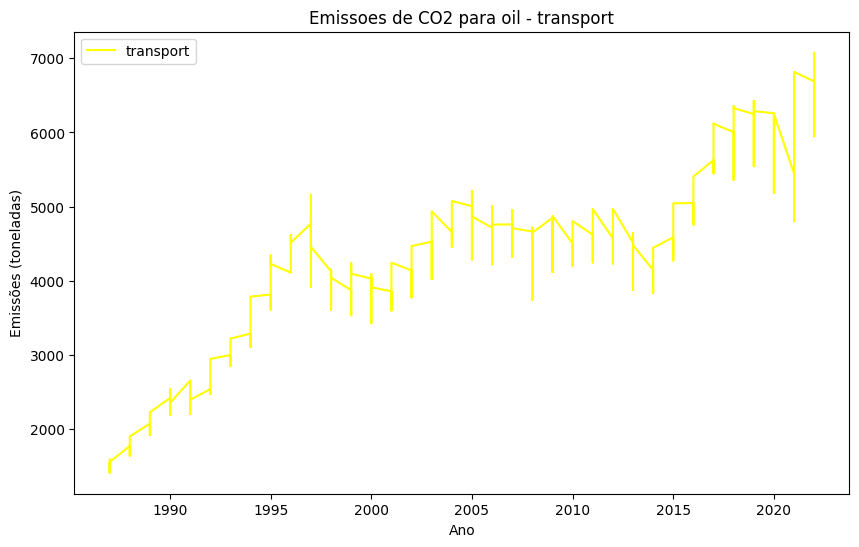

In [ ]:
# Agrupa os dados por tipo de combustível e fonte e gera um gráfico para cada tipo
for fuel_type, group_fuel in df.groupby("fuel_type"):
    for source, group_source in group_fuel.groupby("source"):
        plt.figure(figsize=(10, 6))
        plt.plot(group_source["year"], group_source["emissions_tons"], label=source, color={'transport': 'yellow', 'industry': 'red', 'other': 'blue'}[source])
        plt.title(f"Emissoes de CO2 para {fuel_type} - {source}")
        plt.xlabel("Ano")
        plt.ylabel("Emissões (toneladas)")
        plt.legend()
        plt.show()


Emissões de poluição para cada subgrupo e seus graficos, dados originais

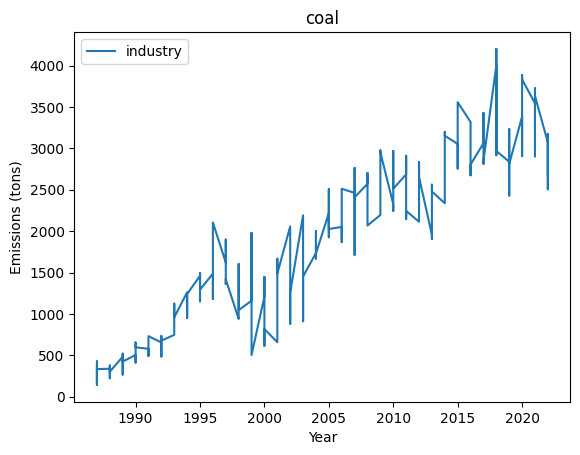

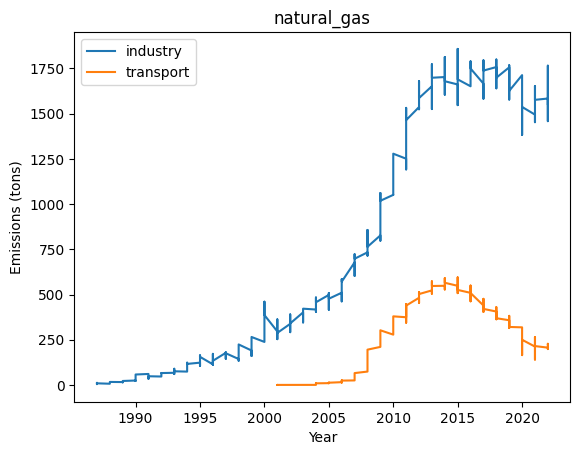

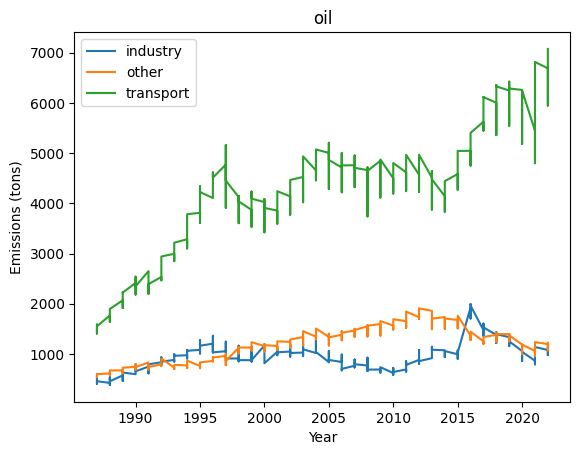

In [ ]:
# Agrupando por fuel_type
groups = df.groupby("fuel_type")

# Plotando um gráfico para cada fuel_type
for fuel, group in groups:
    # Agrupando por source
    sources = group.groupby("source")
    # Configurando a figura e os eixos
    fig, ax = plt.subplots()
    ax.set_title(fuel)
    ax.set_xlabel("Year")
    ax.set_ylabel("Emissions (tons)")
    # Plotando cada função por source
    for source, data in sources:
        ax.plot(data["year"], data["emissions_tons"], label=source)
    # Adicionando a legenda
    ax.legend()
    # Mostrando o gráfico
    plt.show()


# **Definição da matriz de conhecimento e utilização da janela deslizante**

In [ ]:
# declarar matriz vazia de tamanho len(df) - window_size linhas e window_size + 1 colunas (uma maneira facil é usando numpy.zeros())
# estrutura do for é iterar pelo tamanho definido da matriz acima
# o valor da posição i,j na matriz deve ser o valor da posição i + j da coluna que você deseja prever (provavelmente a coluna "emissions_tons")
# tamanho da janela 6 para fazer um calculo semestral para prever o mes 7
window_size = 6
matriz = np.zeros((len(df) - window_size, window_size + 1))
for i in range(0, len(df) - window_size):
  for j in range(0, window_size + 1):
    matriz[i][j] = df.emissions_tons[i + j]

targets = matriz[:, -1]
matriz

array([[1588.61, 1428.29, 1581.16, ..., 1513.35, 1465.69, 1542.77],
       [1428.29, 1581.16, 1557.4 , ..., 1465.69, 1542.77, 1493.17],
       [1581.16, 1557.4 , 1513.35, ..., 1542.77, 1493.17, 1406.57],
       ...,
       [1701.85, 1683.42, 1684.92, ..., 1764.82, 1679.07, 1612.04],
       [1683.42, 1684.92, 1701.02, ..., 1679.07, 1612.04, 1539.67],
       [1684.92, 1701.02, 1764.82, ..., 1612.04, 1539.67, 1553.15]])

**Plota o grafico do target (ultima coluna da janela dezlizante, resultado previsto) para cada tipo de combustivel**

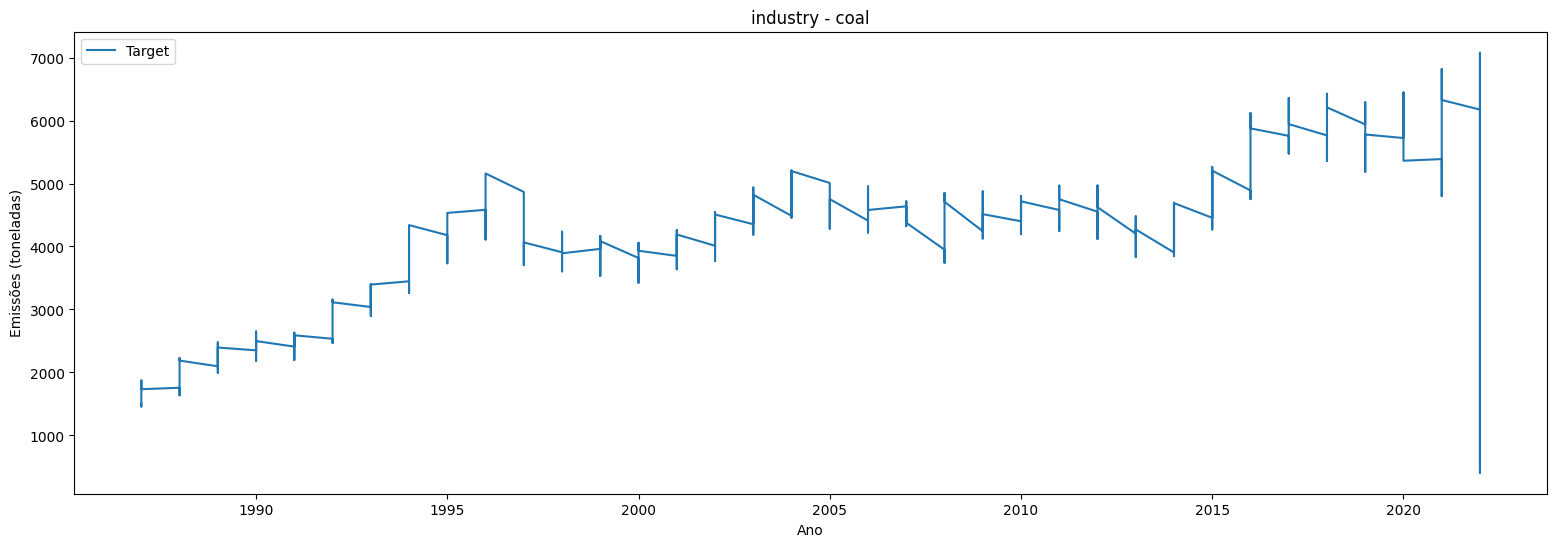

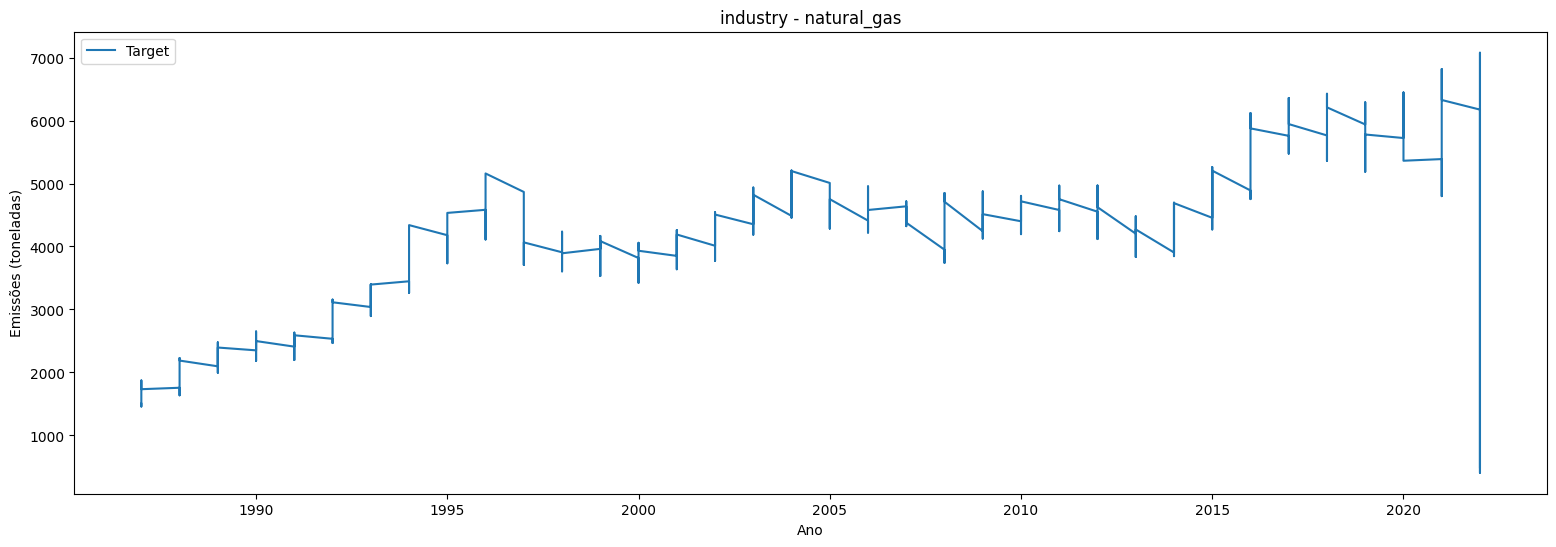

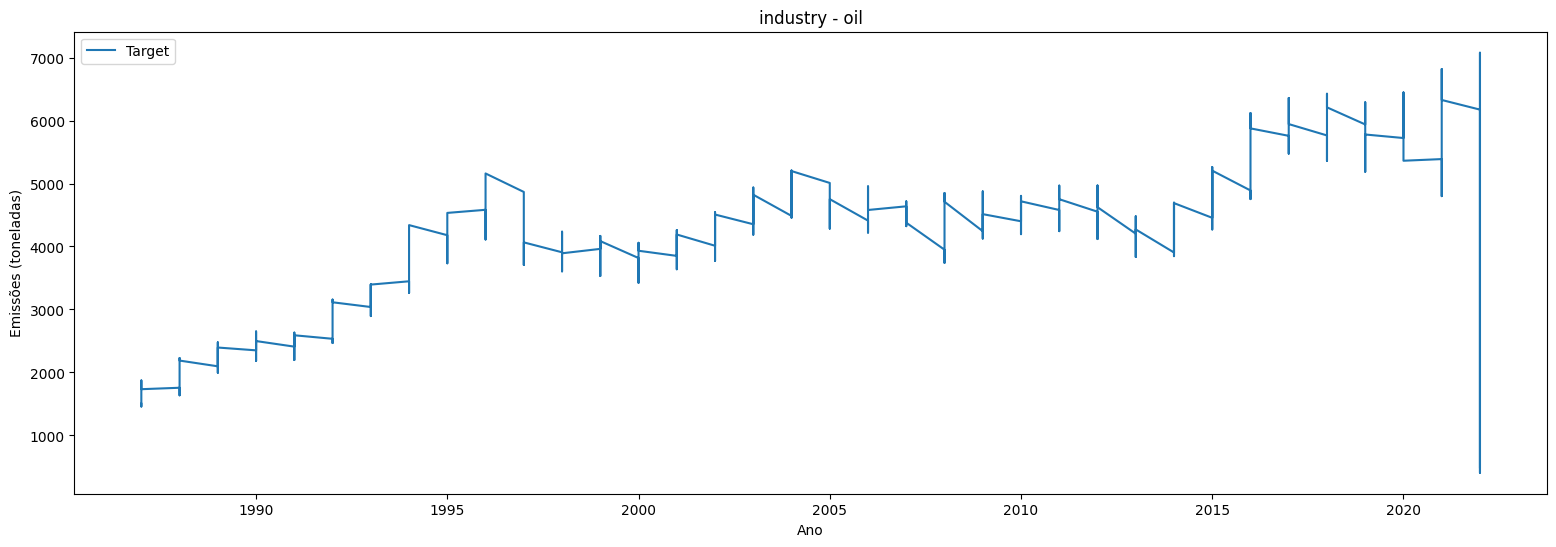

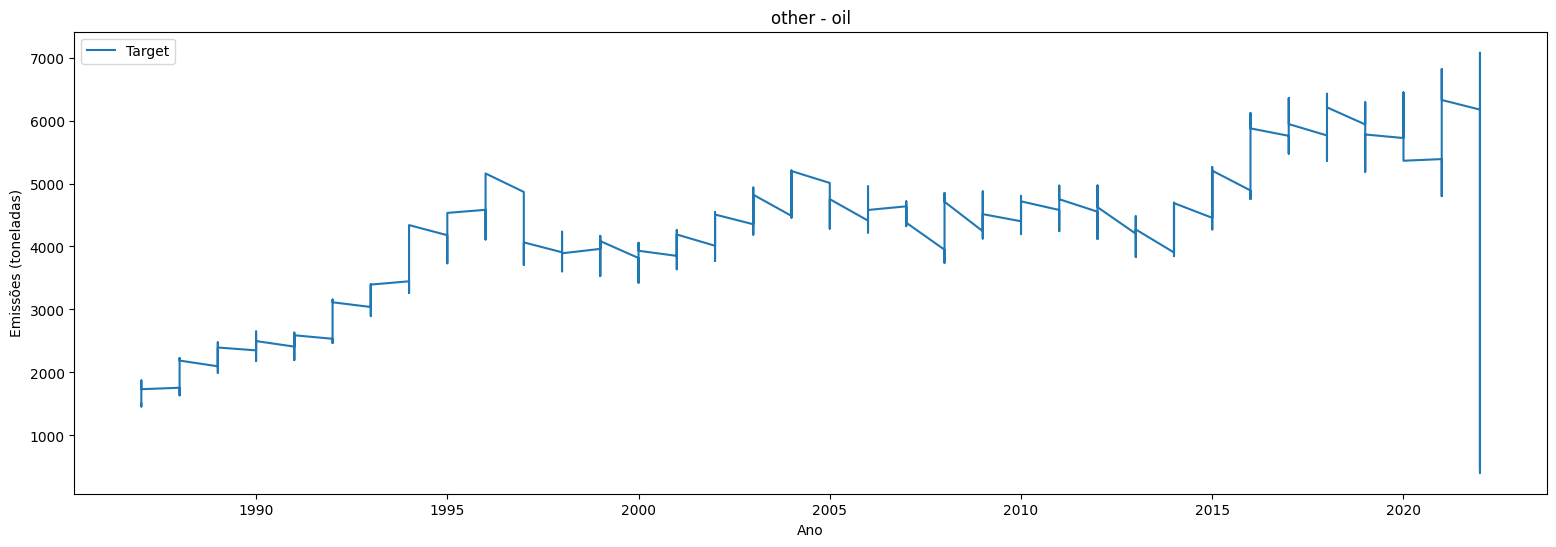

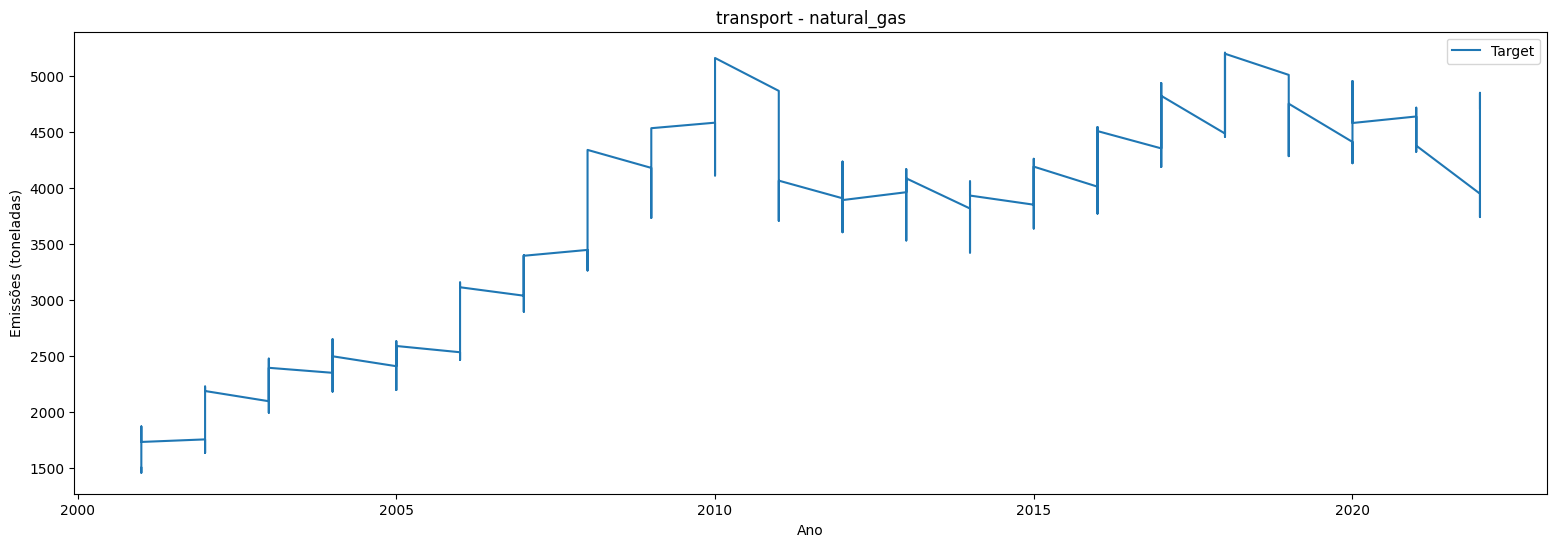

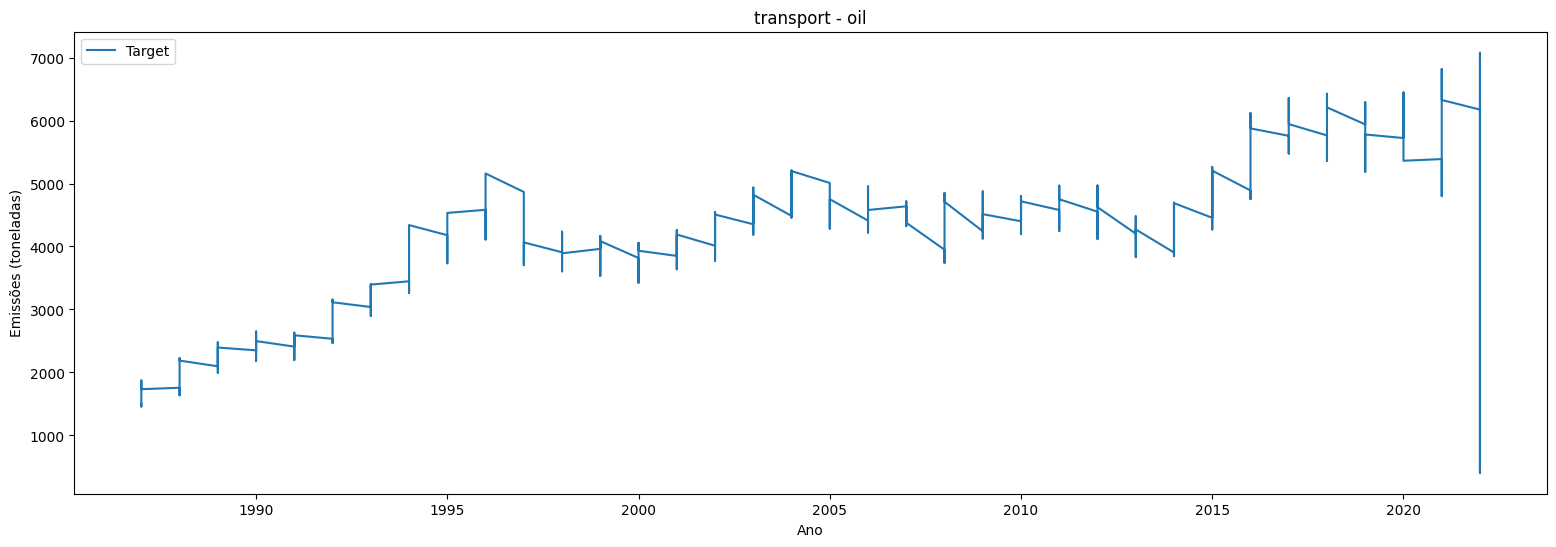

In [ ]:
# define uma paleta de cores
colors = {'transport': 'blue', 'industry': 'green', 'residential': 'red'}

# agrupa os dados por fonte e tipo de combustível
groups = df.groupby(['source', 'fuel_type'])

# itera sobre cada grupo e plota um gráfico por vez
for name, group in groups:
    # ajusta o índice do DataFrame agrupado
    group = group.reset_index(drop=True)
    group.index = group.index + window_size  # adiciona o tamanho da janela ao índice

    # define os valores anteriores como NaNs
    for i in range(1, window_size):
        group[f'emissions_tons_t-{i}'] = group['emissions_tons'].shift(i)
    group = group.dropna()

    fig, ax = plt.subplots(figsize=(19, 6))  # tamanho da figura em polegadas (largura, altura)
    ax.plot(group['year'], targets[group.index - window_size], label='Target')

    ax.set_title(f"{name[0]} - {name[1]}")
    ax.set_xlabel("Ano")
    ax.set_ylabel("Emissões (toneladas)")
    ax.legend()  # Adicione isso para exibir as legendas
    plt.show()


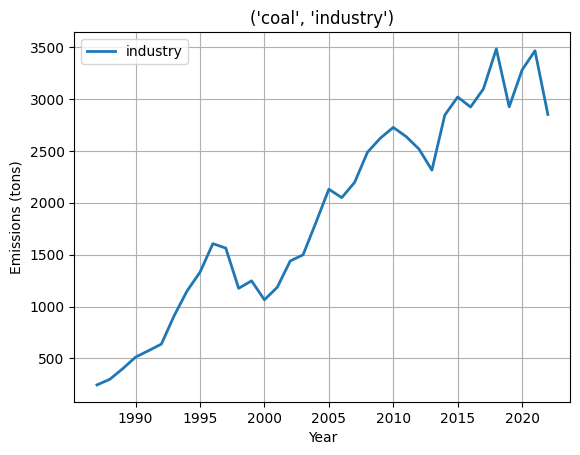

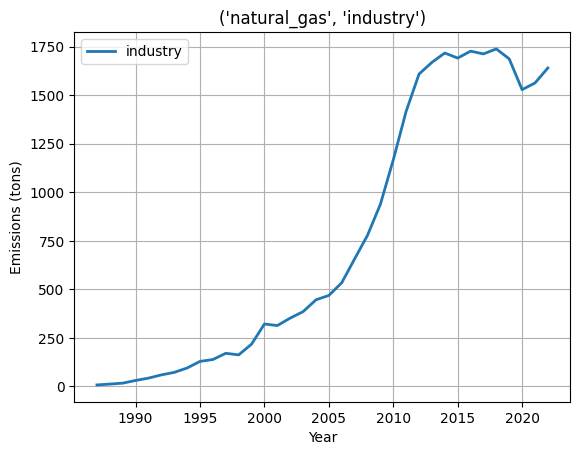

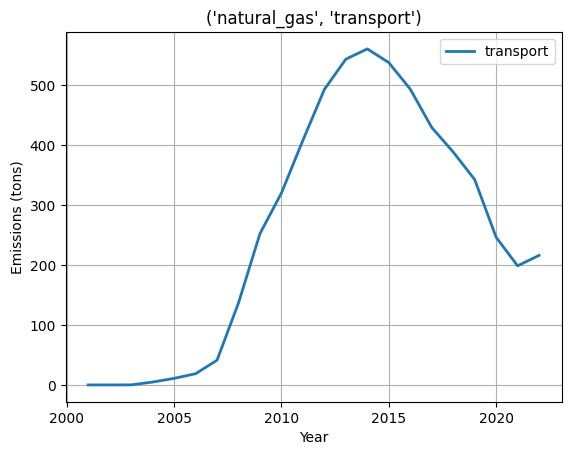

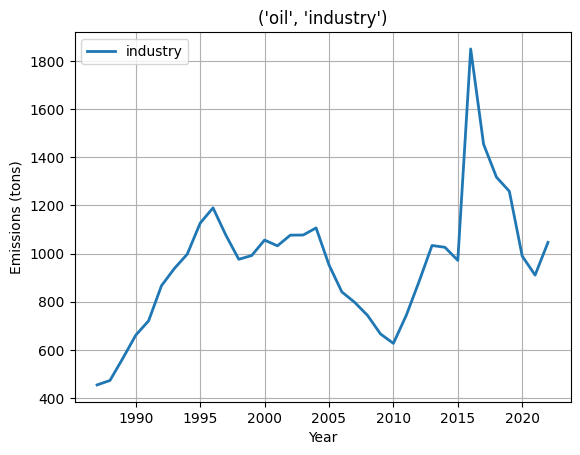

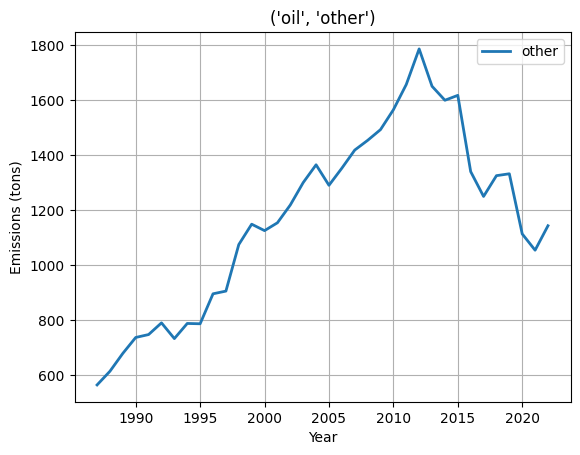

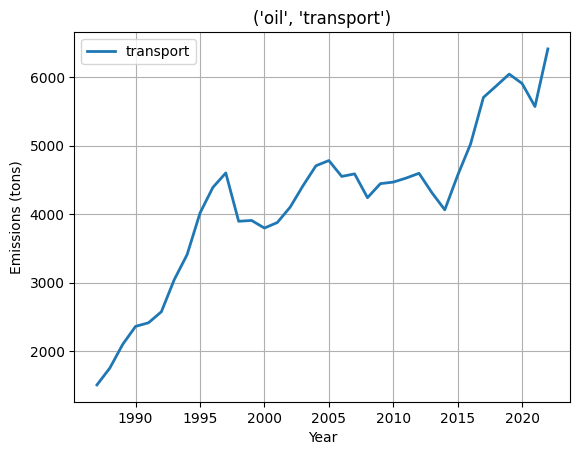

In [ ]:
# Agrupa os dados por fuel_type e source
grouped = df.groupby(['fuel_type', 'source'])

# Loop para gerar os gráficos
for fuel_type, group1 in grouped:
    # Cria uma figura e um eixo para o gráfico
    fig, ax = plt.subplots()
    # Loop para plotar as curvas para cada source
    for source, group2 in group1.groupby('source'):
        # Agrupa os dados por year e calcula a média das emissões
        mean_emissions = group2.groupby('year')['emissions_tons'].mean()
        # Plota a curva
        ax.plot(mean_emissions.index, mean_emissions.values, label=source, linewidth=2)

    # Configurações do gráfico
    ax.set_title(fuel_type)
    ax.set_xlabel('Year')
    ax.set_ylabel('Emissions (tons)')
    ax.legend()
    ax.grid(True)

    # Mostra o gráfico
    plt.show()
